# Understanding Descriptive Statistics

Import the necessary libraries here:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [9]:
def roolling_dice_simulation(num = 10):
    
    dice_values = list(range(1, 7))

    rolls = random.choices(dice_values, k=num)

    df = pd.DataFrame({"Roll": list(range(1, num+1)), "Dice Value": rolls})

    return df

dice_results = roolling_dice_simulation(10)
dice_results  

,Roll,Dice Value
0,1,6
1,2,2
2,3,1
3,4,1
4,5,5
5,6,2
6,7,6
7,8,2
8,9,5
9,10,2


#### 2.- Plot the results sorted by value.

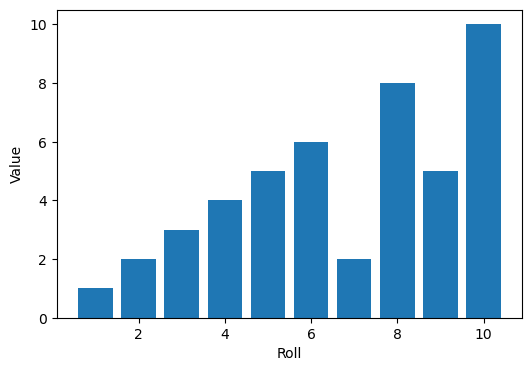

In [12]:
sorted_results = sorted(dice_results, key=lambda x: x[2])

sorted_values = [result[2] for result in sorted_results]
sorted_rolls = [result[0] for result in sorted_results]

plt.figure(figsize = (6, 4))
plt.bar(sorted_rolls, sorted_values)
plt.xlabel('Roll')
plt.ylabel('Value')

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

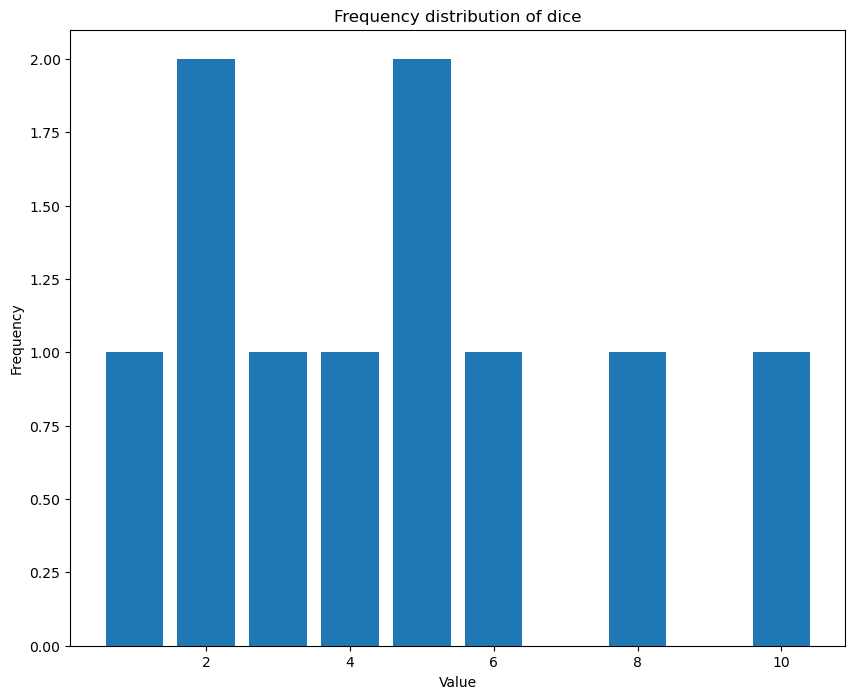

In [21]:
values = [result[2] for result in dice_results]

frequency_distribution = {}
for value in values:
    frequency_distribution[value] = frequency_distribution.get(value, 0) + 1

sorted_values = sorted(frequency_distribution.keys())
frequencies = [frequency_distribution[value] for value in sorted_values]

plt.figure(figsize=(10, 8))
plt.bar(sorted_values, frequencies)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency distribution of dice')

plt.show()

In [ ]:
# The relationship between the two plots is that they provide complementary information 
# about the data. The first plot gives us insight into the distribution of values, showing which values are 
# more likely to occur and how they are spread across the rolls. On the other hand, the second plot gives us 
# a clearer picture of how often each value occurs, showing the frequency or count of each value in the data. 
# Together, these plots give a comprehensive understanding of the distribution of values and their occurrences 
# when rolling the dice.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [25]:
def calculate_mean(data):
    total_sum = 0
    total_observations = len(data)

    for observation in data:
        total_sum += observation

    mean = total_sum / total_observations
    return mean

mean_value = calculate_mean(dice_results)

mean_value

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [91]:
def calculate_frequency_distribution(data):
    frequency_distribution = {}
    for value in data:
        frequency_distribution[value] = frequency_distribution.get(value, 0) + 1
    return frequency_distribution

frequency_distribution = calculate_frequency_distribution(dice_results)
print("Frequency Distribution:")
print(frequency_distribution)

def calculate_mean_from_frequency_distribution(frequency_distribution):
    total_sum = 0
    total_observations = 0

    for value, frequency in frequency_distribution.items():
        total_sum += value * frequency
        total_observations += frequency

    mean = total_sum / total_observations
    return mean

mean_from_frequency = calculate_mean_from_frequency_distribution(frequency_distribution)

mean_from_frequency

Frequency Distribution:
{6: 2, 2: 4, 1: 2, 5: 2}


3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [90]:
def calculate_median(data):
    sorted_data = sorted(data)
    total_observations = len(data)

    if total_observations % 2 == 1:
        median_index = total_observations // 2
        median = sorted_data[median_index]
    else:
        upper_median_index = total_observations // 2
        lower_median_index = upper_median_index - 1
        median = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2

    return median

median_value = calculate_median(dice_results)

median_value

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [93]:
def calculate_quartiles(data):
    sorted_data = sorted(data)
    total_observations = len(data)

    q1_index = total_observations // 4
    q2_index = total_observations // 2
    q3_index = q1_index * 3

    q1_value = sorted_data[q1_index]
    q2_value = sorted_data[q2_index]
    q3_value = sorted_data[q3_index]

    return q1_value, q2_value, q3_value

q1, q2, q3 = calculate_quartiles(dice_results)
print("1st Quartile:", q1)
print("2nd Quartile (Median):", q2)
print("3rd Quartile:", q3)

1st Quartile: 2
2nd Quartile (Median): 2
3rd Quartile: 5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [5]:
dice_rool = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\Descriptive-Stats\data\roll_the_dice_hundred.csv")

dice_rool

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


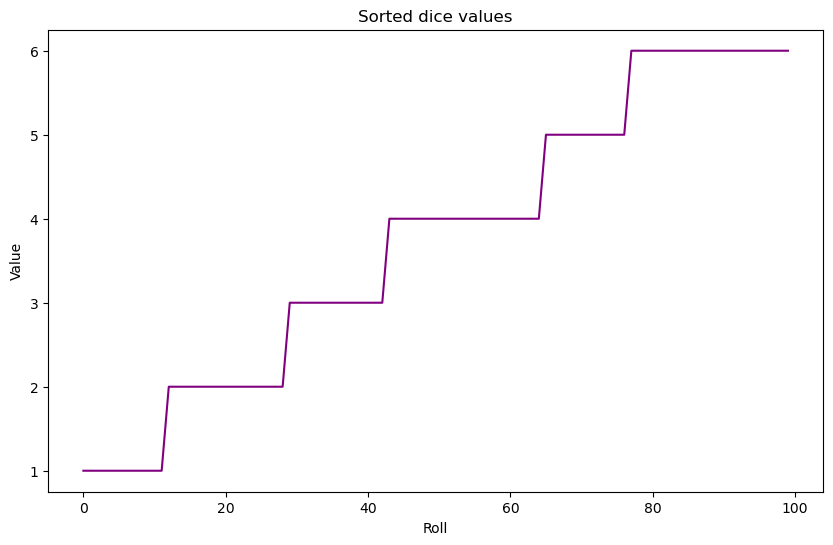

In [9]:
sorted_values = sorted(dice_rool['value'])

plt.figure(figsize=(10, 6))
plt.plot(sorted_values, color='purple')
plt.xlabel('Roll')
plt.ylabel('Value')
plt.title('Sorted dice values')

plt.show()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [36]:
def calculate_mean(data):
    total_sum = 0
    total_observations = len(data)

    for observation in data:
        total_sum += observation

    mean = total_sum / total_observations
    return mean

mean_value = calculate_mean(dice_rool['value'])

mean_value

3.74

#### 3.- Now, calculate the frequency distribution.


In [11]:
def calculate_frequency_distribution(data):
    
    frequency_distribution = {}
    
    for value in data:
        frequency_distribution[value] = frequency_distribution.get(value, 0) + 1
    return frequency_distribution

frequency_distribution = calculate_frequency_distribution(dice_rool['value'])

frequency_distribution

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

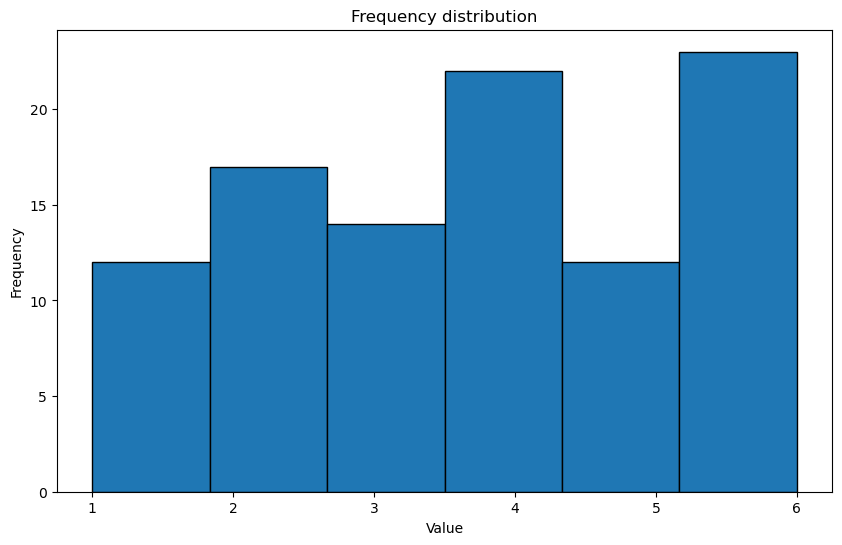

In [12]:
plt.figure(figsize=(10, 6))

plt.hist(dice_rool['value'], bins=len(frequency_distribution.keys()), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency distribution')

plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [14]:
rool_dice_thousand = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\Descriptive-Stats\data\roll_the_dice_thousand.csv")

rool_dice_thousand 

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


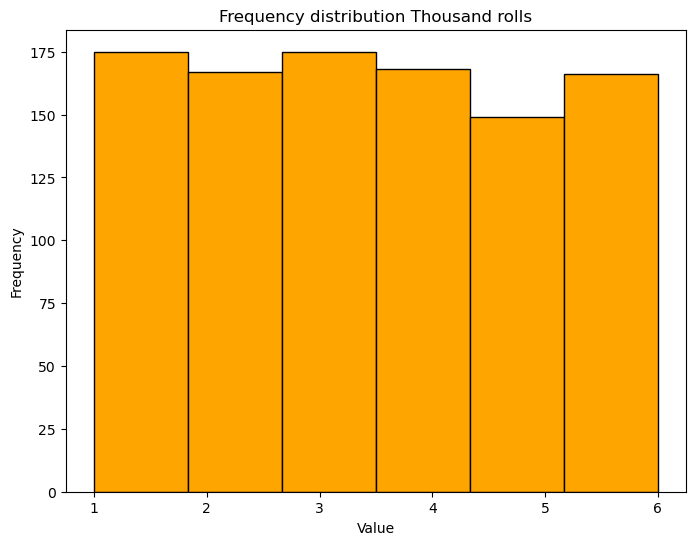

In [15]:
frequency_distribution_1000 = calculate_frequency_distribution(rool_dice_thousand ['value'])

plt.figure(figsize=(8, 6))
plt.hist(rool_dice_thousand ['value'], bins=len(frequency_distribution_1000.keys()), color = 'orange', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency distribution Thousand rolls')

plt.show()

In [ ]:
# The frequency distribution of the dice values becomes more normally distributed.
# As the size of the sample increases, the means, became more normally distributed.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [16]:
import pandas as pd

population = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\Descriptive-Stats\data\ages_population.csv")

population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


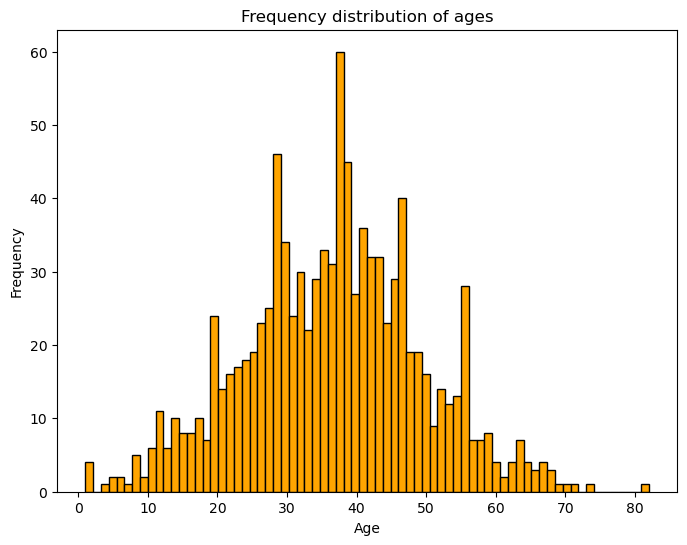

In [28]:
frequency_distribution = population['observation'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.hist(population['observation'], bins=len(frequency_distribution), color = 'orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency distribution of ages')

plt.show()


# I would say 30 to 40 for the mean.
# 10 to 15 to the standard deviation.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [88]:
mean_value = population['observation'].mean()
std_value = population['observation'].std()

print('The exact mean is:', mean_value)
print('The exact standard deviation is:', std_value)

The exact mean is: 36.56
The exact standard deviation is: 12.816499625976762


In [ ]:
# Yes, kind of fall inside the ranges that I tought it could be.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [18]:
population_ages2 = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\Descriptive-Stats\data\ages_population2.csv")

population_ages2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


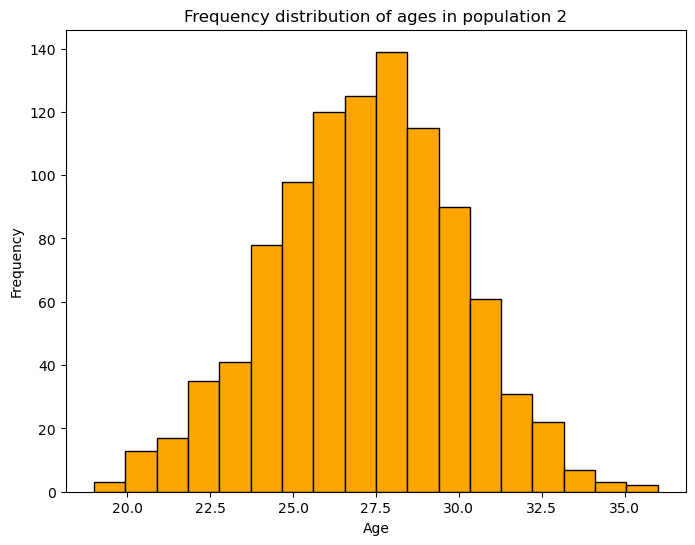

In [29]:
frequency_distribution_ages2 = population_ages2['observation'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.hist(population_ages2['observation'], bins=len(frequency_distribution_ages2), color = 'orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency distribution of ages in population 2')

plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
# the frequency distribution in population is clearly different 
# from the distribution of ages_population2 because the age range is distinct, indicating that the populations
# in the two datasets have different age distributions. 
# Indicating that the two neighborhoods have different age demographics and/or characteristics.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [31]:
mean_value_ages2 = population_ages2['observation'].mean()
std_value_ages2 = population_ages2['observation'].std()

print(mean_value_ages2)
print(std_value_ages2)

27.155
2.969813932689186


In [ ]:
# Population_ages2 represents a population with a narrower age range and more closer ages, being possible to see, 
# by its lower mean and smaller standard deviation.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [21]:
population_ages3 = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\Descriptive-Stats\data\ages_population3.csv")

population_ages3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


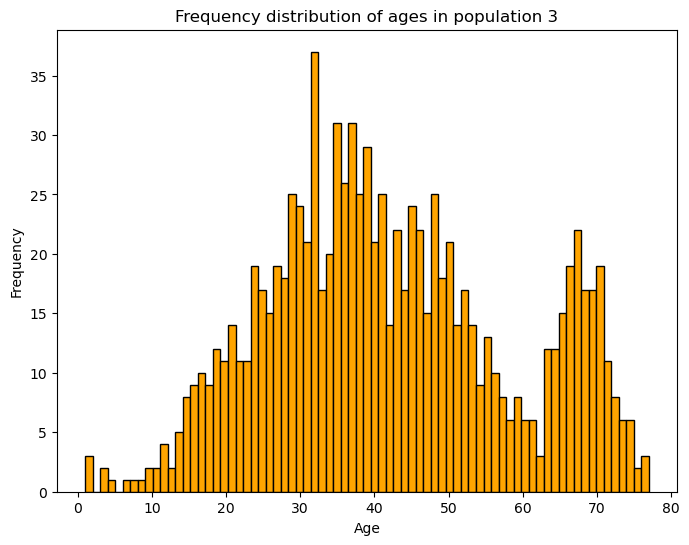

In [30]:
frequency_distribution_ages3 = population_ages3['observation'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.hist(population_ages3['observation'], bins=len(frequency_distribution_ages3), color = 'orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency distribution of ages in population 3')

plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [78]:
mean_value_ages3 = population_ages3['observation'].mean()
std_value_ages3 = population_ages3['observation'].std()

print("Mean of population 3:", mean_value_ages3)
print("Standard Deviation of population 3:", std_value_ages3)

Mean of population 3: 41.989
Standard Deviation of population 3: 16.144705959865934


In [ ]:
# When comparing the mean and standard deviation of population_ages3 with population in step 1, 
# it seems that the mean and standard deviation age have increased.
# Shows a more spread out 'ages' than the dataset 'population'.
# Having a higher 'pick' on 30.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [79]:
q1_ages3 = population_ages3['observation'].quantile(0.25)
q2_ages3 = population_ages3['observation'].quantile(0.50)  
q3_ages3 = population_ages3['observation'].quantile(0.75)

print("1st Quartile:", q1_ages3)
print("2nd Quartile (Median):", q2_ages3)
print("3rd Quartile:", q3_ages3)

median_difference = abs(mean_value_ages3 - q2_ages3)
print("Difference between Median and Mean:", median_difference)

1st Quartile: 30.0
2nd Quartile (Median): 40.0
3rd Quartile: 53.0
Difference between Median and Mean: 1.9889999999999972


In [ ]:
# Its seems that the data in population_ages3 is relatively normally distributed, 
# The larger standard deviation could be contributing to the wider spread of ages observed.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [24]:
percentile_10 = population_ages3['observation'].quantile(0.10)
percentile_90 = population_ages3['observation'].quantile(0.90)

print(percentile_10)
print(percentile_90)

22.0
67.0


In [ ]:
# This distribution, along with the calculated quartiles and the comparison between mean and median, 
# reinforces the idea that the age distribution in population_ages3 is slightly positively, with a 
# concentration of ages around the median.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# In this report, I analyze the age distributions of three different neighborhoods in Barcelona based on the provided data. 

# Dataset:

# Neighborhood 1 - population
# Neighborhood 2 - ages_population2 
# Neighborhood 3 - population_ages3

# The mean of ages:
    
# Neighborhood 1: 36.56
# Neighborhood 2: 27.15
# Neighborhood 3: 41.989

# The standard deviations:
    
# Neighborhood 1: 12.81 
# Neighborhood 3: 16.144

# Distribution Characteristics:

# The quartile and percentile analyses revealed that Neighborhood 2 has a narrower IQR and lower percentiles, 
# indicating a relatively younger population.
# Neighborhood 3 exhibits both younger and older individuals with a wider IQR and higher percentiles.

# Comparisons:

# Neighborhood 1 and Neighborhood 3 share similarities in terms of wider spreads, 
# higher mean ages, but, Neighborhood 1 has a wider age range compared to Neighborhood 3.

# Neighborhood 2 stands out with a narrower age range, lower mean age, and a more 
# normal distribution. It has a younger population.


# In conclusion, the three neighborhoods have distinct age distributions.
# Neighborhood 1 and Neighborhood 3 are similar in terms of wider spreads, but they have different age ranges. 
# Neighborhood 2 has a less spred out age and the population is younger.